In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import sh

seaborn.set(font_scale=1.5)

numjobs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
disks = ['sdb', 'sdc', 'sdd']
columns = ['Device:', 'rrqm/s', 'wrqm/s', 'r/s', 'w/s', 'rkB/s', 'wkB/s',
           'avgrq-sz', 'avgqu-sz', 'await', 'r_await', 'w_await', 'svctm', '%util']

jq = sh.jq.bake('-M', '-r')

In [2]:
def iostat_column_average(column):
    columnavg = pandas.DataFrame()
    for i in range(1, len(disks)+1):
        tmptests = [] # this will store the average for all disks in the test
        for j in numjobs:
            tmpdisks = pandas.Series() # this will store the average for each disk in the test
            for d in disks[0:i]:
                data = pandas.read_csv('results/{:d}-disks/{:d}-jobs/iostat-{:s}.txt'.format(i, j, d),
                                       delim_whitespace=True, header=None, names=columns)
                tmpdisks[d] = data[column].mean()
            tmptests.append(tmpdisks.mean())
        columnavg['{:d} disks'.format(i)] = pandas.Series(tmptests, numjobs)
    return columnavg

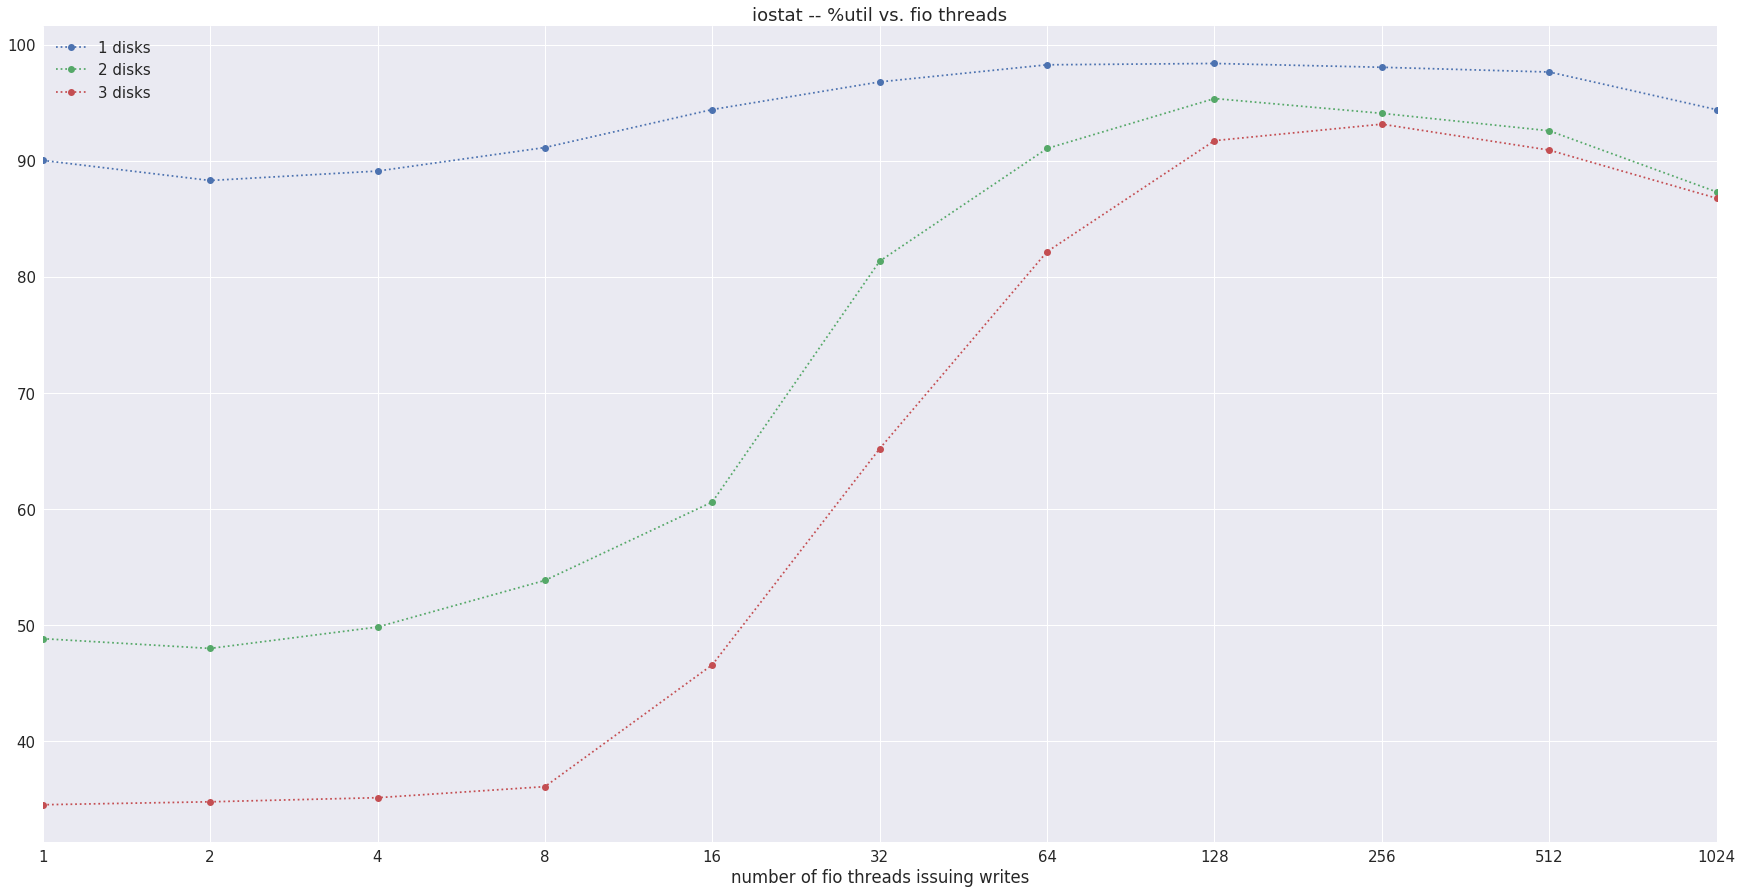

In [3]:
pctutil = iostat_column_average('%util')
pctutil.plot(figsize=(30, 15), style=':o')
plt.title('iostat -- {:s} vs. fio threads'.format('%util'))
plt.xlabel('number of fio threads issuing writes')
plt.xscale('log')
plt.xticks(pctutil.index, pctutil.index)
plt.show()

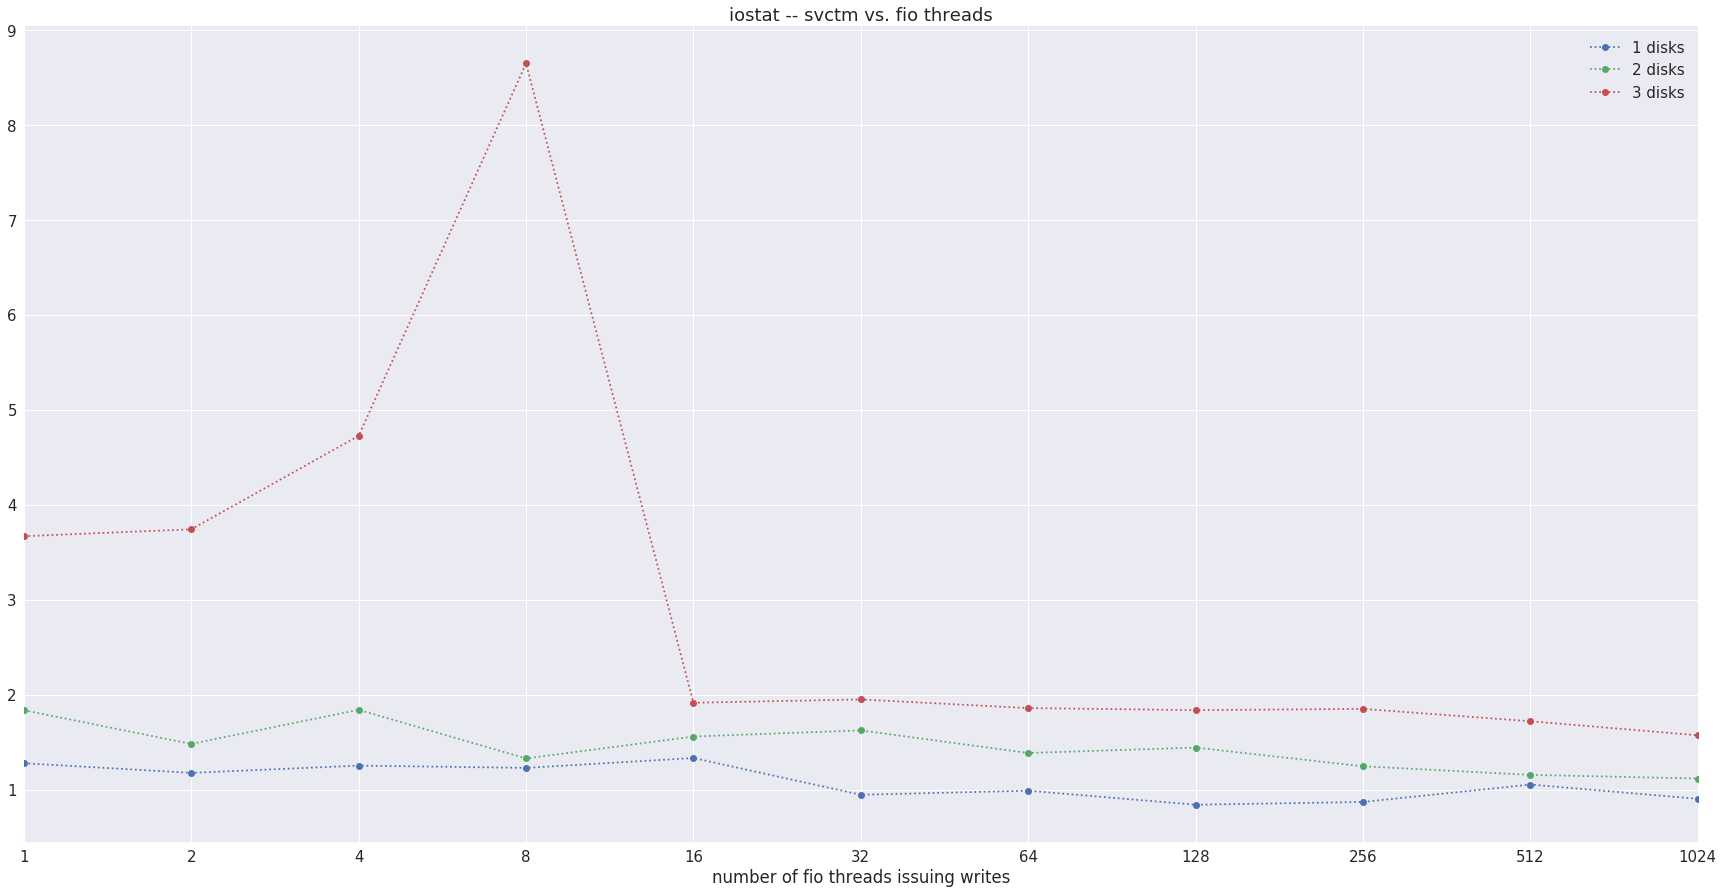

In [4]:
pctutil = iostat_column_average('svctm')
pctutil.plot(figsize=(30, 15), style=':o')
plt.title('iostat -- {:s} vs. fio threads'.format('svctm'))
plt.xlabel('number of fio threads issuing writes')
plt.xscale('log')
plt.xticks(pctutil.index, pctutil.index)
plt.show()

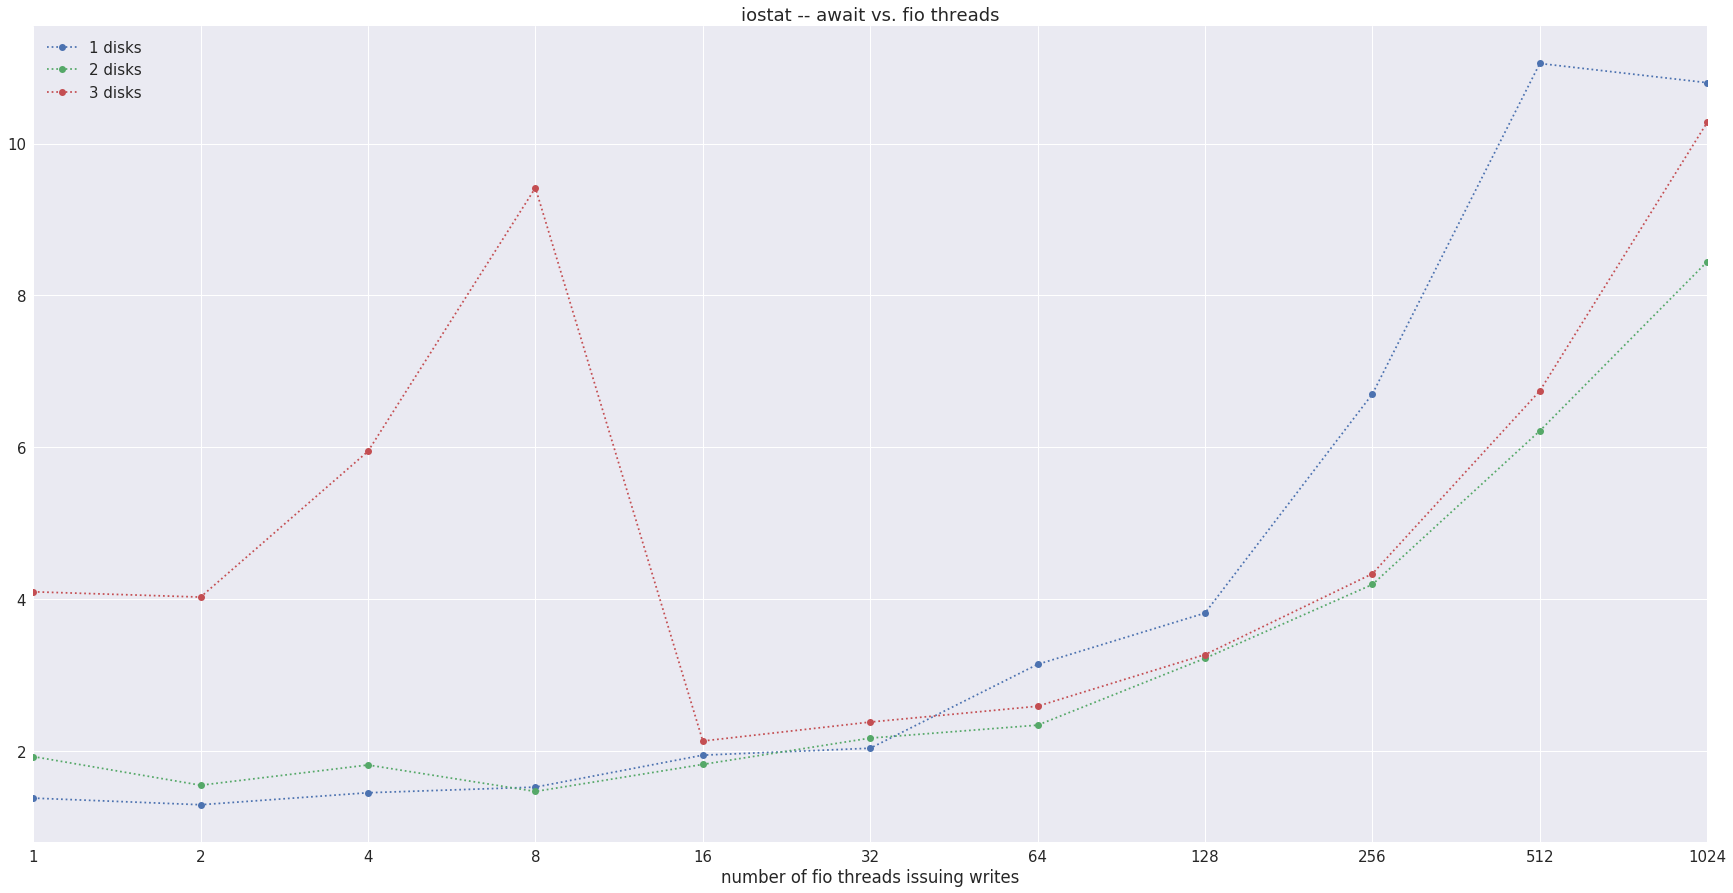

In [5]:
pctutil = iostat_column_average('await')
pctutil.plot(figsize=(30, 15), style=':o')
plt.title('iostat -- {:s} vs. fio threads'.format('await'))
plt.xlabel('number of fio threads issuing writes')
plt.xscale('log')
plt.xticks(pctutil.index, pctutil.index)
plt.show()